## Project Title: Predicting Customer Churn: Uncovering Key Indicators and Retention Strategies


## Introduction

Customer churn, also known as customer attrition or customer turnover, refers to the percentage of customers who cease using a company's product or service within a given timeframe. Understanding and predicting customer churn is crucial for organizations as it directly impacts their profitability and growth. By identifying the factors that contribute to churn, businesses can develop effective retention strategies to mitigate this problem.

In this project, we will analyze a dataset containing various customer attributes such as gender, age, partner status, internet service provider, contract term, and payment method, among others. We aim to explore the relationship between these attributes and the likelihood of customer churn. By conducting a thorough analysis, we can uncover key indicators of churn and identify patterns that indicate a higher propensity for customers to leave the organization.

## Objectives

1.Build a classification model to predict customer churn and assess the likelihood of a customer leaving the organization.

2.Identify key indicators or factors that contribute to customer churn.

3.Formulate effective retention strategies based on the identified indicators to mitigate customer attrition.

## Hypothesis

**Null Hypothesis**: There is no significant relationship between the various customer attributes and the likelihood of customer churn.

**Alternatative Hypothesis**: There is a significant relationship between the various customer attributes and the likelihood of customer churn.

## Questions

1.What are the significant factors that influence customer churn?

2.Can we accurately predict customer churn based on available customer data?

3.How can we use the identified indicators to develop effective retention strategies?

4.Which customer segments are more likely to churn?

5.How can the organization leverage payment methods, contract terms, and billing preferences to reduce churn?

## Importing python libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

## Data Loading
This dataset is a concatenation of three datasets extracted from different sources as follows:
1. SQL Database.
1. OneDrive.
1. Github repository.


In [2]:
df=pd.read_csv('LP2_Telco-churn-complete.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


## Exploratory Data Analysis(EDA)

In [3]:
df.shape

(7043, 22)

In [4]:
df.sample(15)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2776,2776,7503-QQRVF,Male,1,True,False,16,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Credit card (automatic),74.300003,1178.25,True
3856,856,9873-MNDKV,Female,0,No,No,11,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.650000,472.25,No
5095,52,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.050000,2030.75,NaN
4106,1106,5493-SDRDQ,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.100000,113.35,Yes
3016,16,4140-WJAWW,Female,0,No,No,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.850000,108.05,Yes
6946,1903,7330-WZLNC,Female,0,No,No,5,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.800000,455.5,NaN
1119,1119,1459-QNFQT,Male,0,True,True,70,False,NaN,DSL,...,True,True,True,True,Two year,False,Bank transfer (automatic),59.500000,4144.7998046875,False
413,413,5973-EJGDP,Male,0,False,False,51,True,True,Fiber optic,...,True,True,False,False,Month-to-month,True,Electronic check,87.349998,4473.0,False
3509,509,1809-DMJHQ,Female,0,No,Yes,5,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,46.000000,221.7,Yes
1105,1105,7363-QTBIW,Female,0,True,False,9,True,False,Fiber optic,...,False,False,False,True,Month-to-month,True,Electronic check,79.750000,769.0999755859375,False


In [5]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     6774 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    6392 non-null   object 
 11  OnlineBackup      6392 non-null   object 
 12  DeviceProtection  6392 non-null   object 
 13  TechSupport       6392 non-null   object 
 14  StreamingTV       6392 non-null   object 
 15  StreamingMovies   6392 non-null   object 
 16  Contract          7043 non-null   object 


In [7]:
# sum of null values
df.isnull().sum()

Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [8]:
df.drop(columns={'Unnamed: 0'}, inplace = True)

In [9]:
df['Churn'].value_counts()


False    2219
No       1487
True      780
Yes       556
Name: Churn, dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.349998
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# categorical and numerical columns
cat=[]
num=[]

for column in df.columns:
    if df[column].nunique()> 9:
        num.append(column)
    else:
        cat.append(column)

In [12]:
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
num

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
# Select the columns with missing values
# columns_with_missing = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                #        'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']


# imputer = SimpleImputer(strategy='most_frequent')

# imputer.fit(df[columns_with_missing])

# Transform and replace the missing values in the DataFrame
# df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [15]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [16]:
df['Churn'].unique()

array(['False', 'True', nan, 'No', 'Yes'], dtype=object)

In [17]:
df['Churn'] = df['Churn'].replace({'False': 'No', 'True': 'Yes'})


## Univariate Analysis

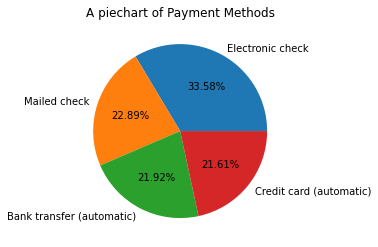

In [18]:
df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.2f%%', title='A piechart of Payment Methods',label='');

**Electronic check** is the most used payment method by customers, followed by **mailed check**.

In [19]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

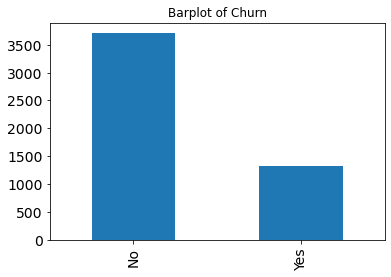

In [20]:
df['Churn'].value_counts().plot(kind='bar',title='Barplot of Churn',fontsize=14);

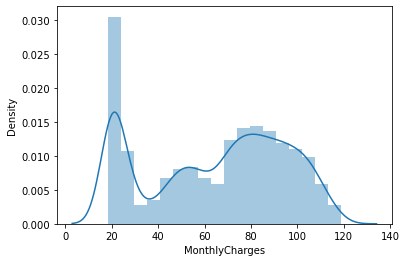

In [21]:
sns.distplot(df['MonthlyCharges']);

In [22]:
df['MonthlyCharges'].skew()

-0.22052443095612614

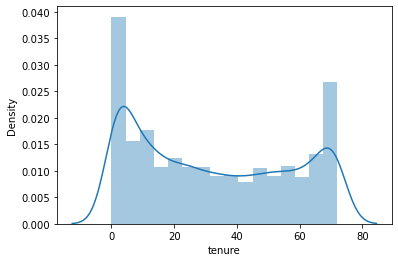

In [23]:
sns.distplot(df['tenure']);

## Bivariate and Multivariate Analysis 

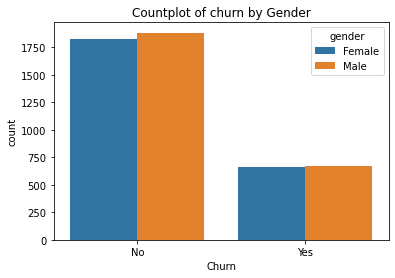

In [24]:
sns.countplot( x='Churn', hue='gender', data=df)
plt.title('Countplot of churn by Gender')
plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='gender'>

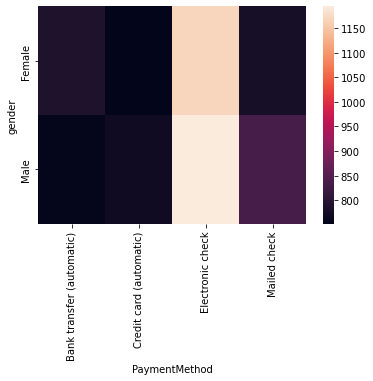

In [25]:
sns.heatmap(pd.crosstab(df['gender'],df['PaymentMethod']))

## Feature Processing and Engineering

In [26]:
# dropping duplicates
df.duplicated().value_counts()

False    7043
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
# Select the columns with missing values
columns_with_missing = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']


imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(df[columns_with_missing])

# Transform and replace the missing values in the DataFrame
df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [29]:
X=df.drop(columns={'Churn'},axis=1)
y=df['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,True,False,1,False,No,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789
3,7795-CFOCW,Male,0,False,False,45,False,No,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95
7039,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3
7040,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7
7041,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35


In [30]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn, Length: 7043, dtype: object

In [31]:
# Use train_test_split with a random_state, and add stratify for Classification
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('Training', X_train.shape, y_train.shape)
print('Testing', X_test.shape, y_test.shape)

Training (5634, 20) (5634,)
Testing (1409, 20) (1409,)


categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Define a dictionary to map the values you want to replace
value_mapping = {
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
}

# Transform the relevant columns
for col in categorical_columns:
    if col in df.columns:
        df[col].replace(value_mapping, inplace=True)


## Feature Encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Print the encoded DataFrame
print(encoded_df)

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Combine the training and testing datasets
combined_data = pd.concat([X_train, X_test], axis=0)

# Apply encoding transformations on the combined dataset
encoder = OneHotEncoder()
combined_data_encoded = encoder.fit_transform(combined_data)

# Split the combined dataset back into training and testing datasets
X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]

# Train the machine learning model using the encoded training dataset
#model.fit(X_train_encoded, y_train)

# Use the encoded testing dataset for predictions or evaluation
#predictions = model.predict(X_test_encoded)


## Feature Scaling

In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Create a scaler object
scaler = StandardScaler(with_mean=False)

# Fit the scaler on the training data
scaler.fit(X_train_encoded)

# Apply the same scaling transformations on the training and testing data
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

model= LogisticRegression()
# Train the machine learning model using the scaled training dataset
model.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled testing dataset
accuracy = model.score(X_test_scaled, y_test)
print('model accuracy',accuracy)

model accuracy 0.8225691980127751


## Train_set Balancing

In [34]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



ValueError: could not convert string to float: '3951-NJCVI'

In [ ]:
row_index = df[df['customerID'] == '3951-NJCVI'].index[0]
print(df.loc[row_index])


## Machine Learning modeling
 **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model ##001

## Create the model

## Train the model

In [ ]:
# Use the .fit method

## Evaluate the model on the Evaluation dataset(Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report

## Predict on an unknown dataset(Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model ##002

## Create the model

## Train the model

## Evaluate the model on the Evaluation dataset(Evalset)

## Predict on an unkown dataset(Testset)

## Models comparison

Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning

Fine-tune the Top-k models (3 < k < 5) using a `GridSearchCV` (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

## Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app